# From Regression to Classification
## Creating a Classifier from Linear Regression
Based on a few tutorials:
- https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/
- https://gist.github.com/jinglescode/c0a3065dfb0fdc03287938cc600489a3
- https://jinglescode.github.io/2019/05/07/why-linear-regression-is-not-suitable-for-classification/

Adapted by Mark Dredze

In [22]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family="serif", size=14)


from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression()

from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression(solver='lbfgs')

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

correct_color = 'b'
wrong_color = 'r'

Let's start with a simple dataset. Suppose we are organizing a 5K race. We will invite runners to compete in the race based on a qualifying event, a tryout. In the tryout, each runner will run for whatever distance they would like. Those who run at least 5K will be invited to participate in the 5K race.

We will use machine learning (completely unnecessary!) to decide if someone qualifies for the race based on how far they run in the qualifying event.

Every data point $x$ (instance) represents a runner, where the value $x$ is the distance they ran in the qualifier. $y$ is whether or not they qualified.

Very simply, if $x >= 5$ then $y = $ `True`; else `False`.

In [23]:
np.random.seed(42)
x = np.random.rand(12, 1)
x_test = np.random.rand(12, 1)
x = [entry * 10 for entry in x] # The upper limit is 10 km.
x_test = [entry * 10 for entry in x_test] # The upper limit is 10 km.

y = [1 if entry >= 5 else 0 for entry in x]
y_test = [1 if entry >= 5 else 0 for entry in x_test]

print ('%d train instances, %d test instances' % (len(x), len(x_test)))

12 train instances, 12 test instances


We have created a dataset where we the runners have run random distances between 0 and 10 km. We've applied our rule that a runner qualifies for the race (`True` = 1) if they ran at least 5 km, and they did not qualify (`False` = 0) otherwise.

Let's plot our dataset with a line at the decision boundary.


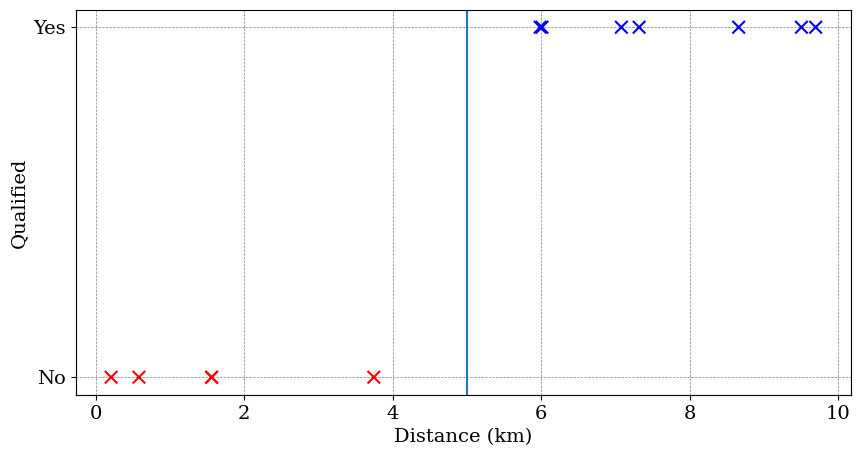

In [24]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
xlabel = 'Distance (km)'
ylabel = 'Qualified'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.yticks([0, 1], ["No", "Yes"])
plt.grid(color='k', linestyle='--', linewidth=0.5, alpha=0.5)
colors = [correct_color if y_ == 1 else wrong_color for y_ in y]
plt.scatter(x, y, marker='x', color=colors, s=81)
_ = plt.axvline(x=5)

The y-axis shows the binary output: did they qualify for the race. The decision boundary at $x=5$ shows our qualifying criteria.

This is a fairly trivial problem so we'd expect a linear regression model to do very well.

Qualified = -0.110 + Distance * 0.134


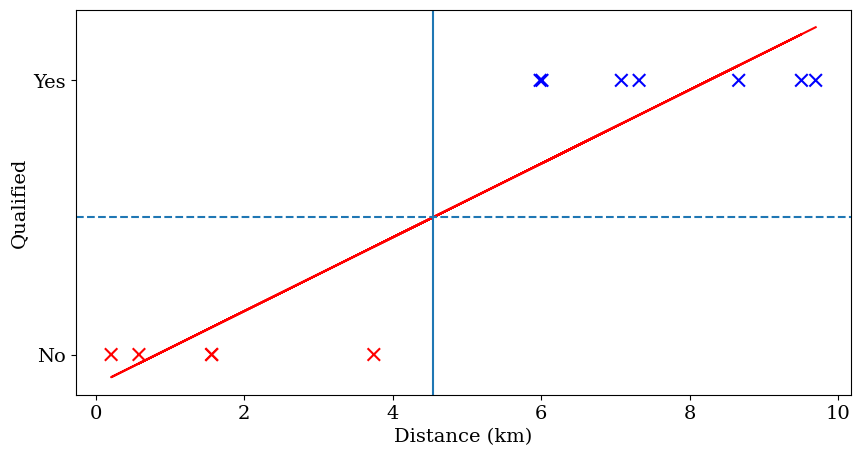

In [25]:
x_df = pd.DataFrame(x)

lin_regression.fit(x_df, y)

inter = lin_regression.intercept_
slope = lin_regression.coef_[0]
print(f"Qualified = {inter:.3f} + Distance * {slope:.3f}")
crosses_05_at = (0.5 - inter) / slope

lin_y_pred_1 = lin_regression.predict(x_df)

fig = plt.figure(figsize=(10,5))
xlabel = 'Distance (km)'
ylabel = 'Qualified'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.yticks([0, 1], ["No", "Yes"])
# plt.grid(color='k', linestyle=':', linewidth=1)

plt.plot(x, lin_y_pred_1, '-r')

colors = [correct_color if y_ == 1 else wrong_color for y_ in y]
plt.scatter(x, y, marker='x', color=colors, s=81)
_ = plt.axvline(x=crosses_05_at)
_ = plt.axhline(y=0.5, linestyle='--')

The linear regression model looks pretty good. The line intercepts the decision boundary at x=5 with a y value of 0.5. If we set a threshold on the output of the regression model of 0.5, then all $x$ values above 5 will be labeled `True` and everything below 5 will be labeled `False`. That is exactly correct.

In [26]:
y_pred = lin_regression.predict(x)
y_pred = [True if entry >= 0.5 else False for entry in y_pred]
print ('Train accuracy', accuracy_score(y, y_pred, normalize=True))


y_test_pred = lin_regression.predict(x_test)
y_test_pred = [True if entry >= 0.5 else False for entry in y_test_pred]
print ('Test accuracy', accuracy_score(y_test, y_test_pred, normalize=True))

Train accuracy 1.0
Test accuracy 1.0


So, what's the problem?

Let's consider a small change to your dataset. Instead of having runners who ran between 0 and 10 km, we will have add long distance runners to the data. These runners can run up to 100 km!

In [27]:
x2 = x + [entry * 100 for entry in np.random.rand(12, 1)] # The upper limit is 100 km.
x_test2 = x_test + [entry * 100 for entry in np.random.rand(12, 1)]

y2 = [1 if entry >= 5 else 0 for entry in x2]
y_test2 = [1 if entry >= 5 else 0 for entry in x_test2]

print ('%d train instances, %d test instances' % (len(x), len(x_test)))

12 train instances, 12 test instances


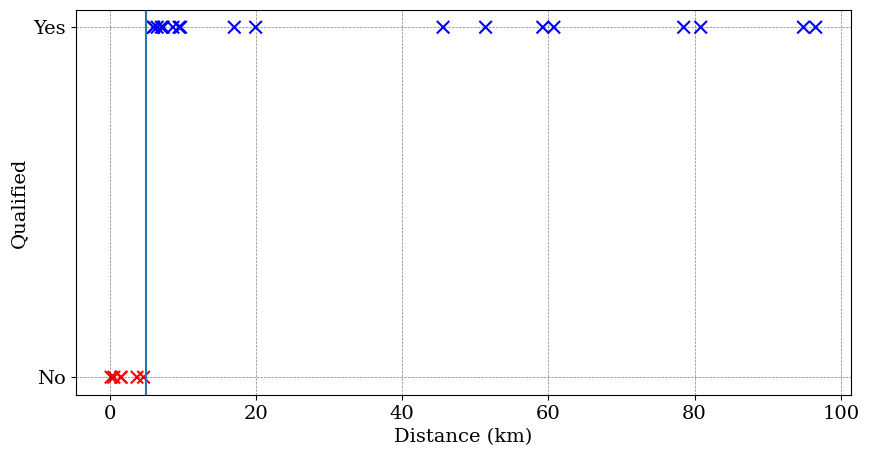

In [28]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
xlabel = 'Distance (km)'
ylabel = 'Qualified'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.yticks([0, 1], ["No", "Yes"])
plt.grid(color='k', linestyle='--', linewidth=0.5, alpha=0.5)
colors = [correct_color if y_ == 1 else wrong_color for y_ in y2]
plt.scatter(x2, y2, marker='x', color=colors, s=81)
_ = plt.axvline(x=5)

The dataset is still trivial. No problem, right?

Qualified = 0.572 + Distance * 0.006


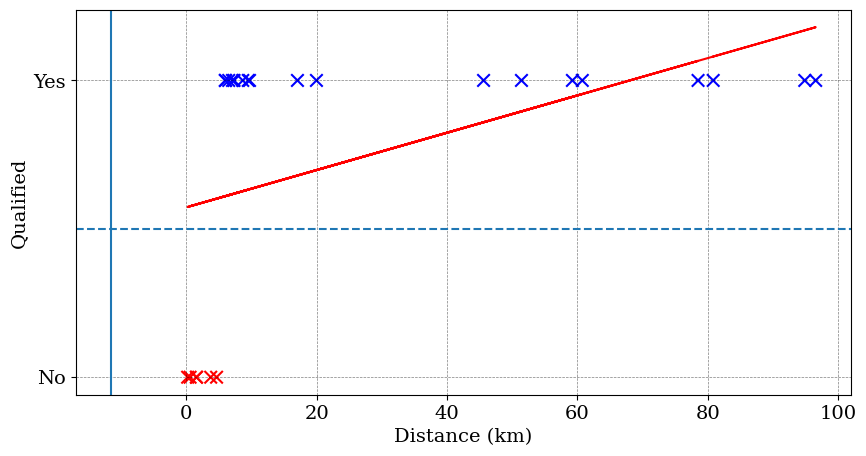

In [29]:
x2_df = pd.DataFrame(x2)

lin_regression.fit(x2_df, y2)

inter = lin_regression.intercept_
slope = lin_regression.coef_[0]
print(f"Qualified = {inter:.3f} + Distance * {slope:.3f}")
crosses_05_at = (0.5 - inter) / slope

lin_y_pred_2 = lin_regression.predict(x2_df)

fig = plt.figure(figsize=(10,5))
xlabel = 'Distance (km)'
ylabel = 'Qualified'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.yticks([0, 1], ["No", "Yes"])
plt.grid(color='k', linestyle='--', linewidth=0.5, alpha=0.5)

plt.plot(x2, lin_y_pred_2, '-r')

colors = [correct_color if y_ == 1 else wrong_color for y_ in y2]
plt.scatter(x2, y2, marker='x', color=colors, s=81)
_ = plt.axvline(x=crosses_05_at)
_ = plt.axhline(y=0.5, linestyle='--')

In [30]:
y_pred_raw2 = lin_regression.predict(x2)
y_pred2 = [True if entry >= 0.5 else False for entry in y_pred_raw2]
print ('Train accuracy: {:.1f}%'.format(
    100*accuracy_score(y, y_pred, normalize=True)))


y_test_pred_raw2 = lin_regression.predict(x_test2)
y_test_pred2 = [True if entry >= 0.5 else False for entry in y_test_pred_raw2]
print ('Test Accuracy: {:.1f}%'.format(
    100*accuracy_score(y_test2, y_test_pred2, normalize=True)))

print ("{:.1f}% Predicted as qualifying for the race".format(
    100 * np.mean(y_pred2 + y_test_pred2)))


Train accuracy: 100.0%
Test Accuracy: 58.3%
100.0% Predicted as qualifying for the race


That's a big drop in accuracy! What happened? 

Take a look at the plot of the new dataset with the new linear regression model. Now, the linear function passes the decision boundry at a value around 0.5, not 0.5 as before. That means we are essentially classifying everyone as qualified!

Why is that happening? 

For some insight, let's take a look at the loss function: squared error.

-0.5960248348977534, 0.3677664639200746, 0.381511578670366, 0.38989082204149095, -0.5822922188169759, -0.5822907030293236, -0.5761376560986237, 0.3730791229440267, 0.38973644568485233, 0.3830148767010645, -0.5737810868823235, 0.36656015201792913, 0.14090297305582644, -0.06591816267125683, 0.3020308691849547, 0.10435049661918827, 0.055219503893431554, -0.6016784722281078, 0.0457111310922691, 0.3203494835193861, 0.3866319277793868, -0.16879870194121294, -0.17932275657830887, -0.08051125398036185, 

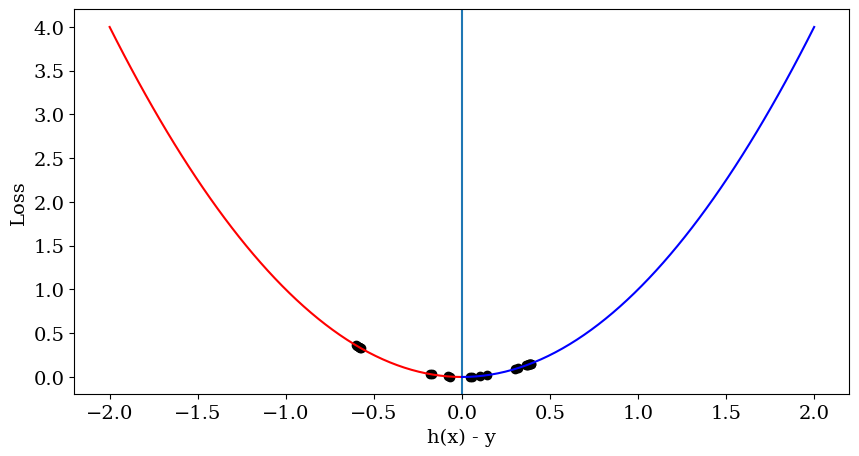

In [31]:
x_plot_wrong = np.linspace(-2, 0)
y_plot_wrong = [(entry - 0) ** 2 for entry in x_plot_wrong]

x_plot_correct = np.linspace(0, 2)
y_plot_correct = [(entry - 0) ** 2 for entry in x_plot_correct]

losses_x = []
losses_y = []
for y_, y_pred_ in zip(y2, y_pred_raw2):
  print(y_ - y_pred_, end=", ")
  losses_x.append(y_ - y_pred_)
  losses_y.append((y_ - y_pred_) ** 2)


fig = plt.figure(figsize=(10,5))
xlabel = 'h(x) - y'
ylabel = 'Loss'
plt.xlabel(xlabel)
plt.ylabel(ylabel)


_ = plt.axvline(x=0)

_ = plt.plot(x_plot_wrong, y_plot_wrong, wrong_color)
_ = plt.plot(x_plot_correct, y_plot_correct, correct_color)
_ = plt.scatter(losses_x, losses_y, c='black')


We can now understand why linear regression does poorly on classification tasks. Everything to the right of the vertical bar is a correct prediction. However, because we aren't exactly predicting the numeric label, we have a non-zero loss. The optimizer will try to minimize this error, which means it will change parameters to reduce the loss on already correct examples.

Our loss function does not match our evaluation. That's a big problem.

Let's now look at a different loss function that captures accuracy; it only cares if we are predicting the correct label.


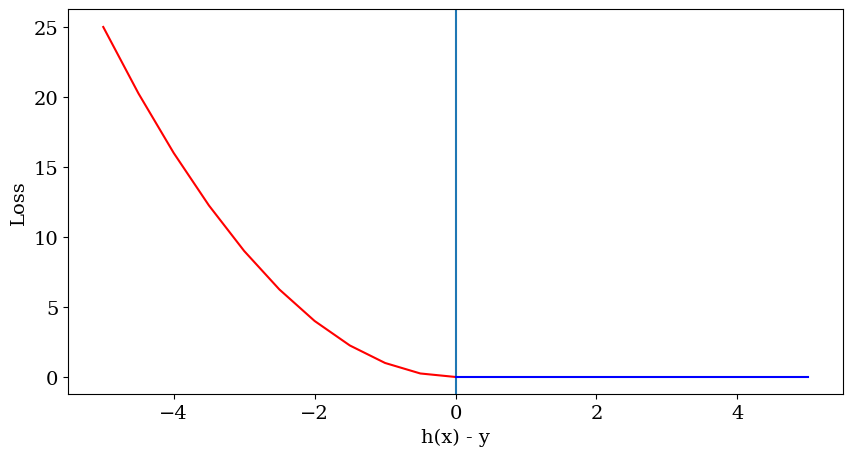

In [32]:
x_plot_wrong = np.arange(-5, .5, .5)
y_plot_wrong = [0 if entry > 0 else (entry - 0) ** 2  for entry in x_plot_wrong]

x_plot_correct = np.arange(0, 5.5, .5)
y_plot_correct = [0 if entry > 0 else (entry - 0) ** 2 for entry in x_plot_correct]


fig = plt.figure(figsize=(10,5))
xlabel = 'h(x) - y'
ylabel = 'Loss'
plt.xlabel(xlabel)
plt.ylabel(ylabel)


_ = plt.axvline(x=0)

_ = plt.plot(x_plot_wrong, y_plot_wrong, wrong_color)
_ = plt.plot(x_plot_correct, y_plot_correct, correct_color)

This loss function isn't quite what we will end up using, but it's closer to what we want. It has the same behavior as squared error, except when the prediction is correct it has 0 loss. If we were to optimize this loss, the optimization would ignore predictions that are correct even if $h(x) - y > 0$.



As a final step, let's verify that there is a classifier that can do well on this task. We'll consider logistic regression, which we will learn about in our next lecture.


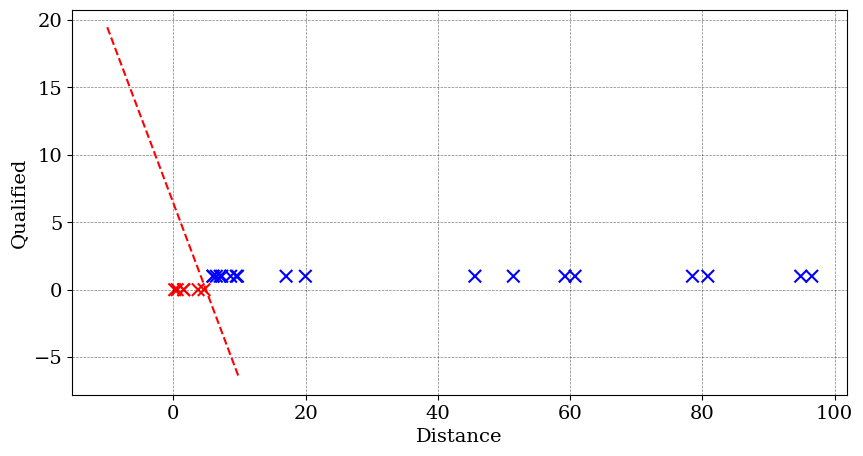

In [33]:
log_regression.fit(pd.DataFrame(x2), y2)
fig = plt.figure(figsize=(10,5))

x_vals = np.arange(-10, 10, .1)
y_vals = -(x_vals * log_regression.coef_[0][0] + log_regression.intercept_[0])
plt.plot(x_vals, y_vals, '--', c="red")

xlabel = 'Distance'
ylabel = 'Qualified'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle='--', linewidth=0.5, alpha=0.5)

colors = [correct_color if y_ == 1 else wrong_color for y_ in y2]
plt.scatter(x2, y2, marker='x', color=colors, s=81)

The dashed red line is the decision boundary learned by the logistic regression classifier. All instances to one side (the right) will be labeled positive. Everything to the left will be labeled negative. You can see that this is really close to the true decision boundary, and effectivelty the same.

In [34]:
y_pred = log_regression.predict(pd.DataFrame(x))
print ('Train accuracy', accuracy_score(y, y_pred, normalize=True))


y_test_pred = log_regression.predict(x_test)
print ('Test Accuracy', accuracy_score(y_test, y_test_pred, normalize=True))


Train accuracy 1.0
Test Accuracy 1.0
